# Df 0 1 7_Vec Ops H E P
This tutorial shows how VecOps can be used to slim down the programming
model typically adopted in HEP for analysis.
In this case we have a dataset containing the kinematic properties of
particles stored in individual arrays.
We want to plot the transverse momentum of these particles if the energy is
greater than 100.




**Author:** Danilo Piparo, Andre Vieira Silva  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:09 AM.</small></i>

In [1]:
auto filename = gROOT->GetTutorialDir() + "/dataframe/df017_vecOpsHEP.root";
auto treename = "myDataset";
using doubles = ROOT::VecOps::RVec<double>;
using RDF = ROOT::RDataFrame;

 A helper function is created: 

In [2]:
%%cpp -d
void WithTTreeReader()
{
   TFile f(filename);
   TTreeReader tr(treename, &f);
   TTreeReaderArray<double> px(tr, "px");
   TTreeReaderArray<double> py(tr, "py");
   TTreeReaderArray<double> E(tr, "E");

   TH1F h("pt", "pt", 16, 0, 4);

   while (tr.Next()) {
      for (auto i=0U;i < px.GetSize(); ++i) {
         if (E[i] > 100) h.Fill(sqrt(px[i]*px[i] + py[i]*py[i]));
      }
   }
   h.DrawCopy();
}

 A helper function is created: 

In [3]:
%%cpp -d
void WithRDataFrame()
{
  RDF f(treename, filename.Data());
   auto CalcPt = [](doubles &px, doubles &py, doubles &E) {
      doubles v;
      for (auto i=0U;i < px.size(); ++i) {
         if (E[i] > 100) {
            v.emplace_back(sqrt(px[i]*px[i] + py[i]*py[i]));
         }
      }
      return v;
   };
   f.Define("pt", CalcPt, {"px", "py", "E"})
    .Histo1D<doubles>({"pt", "pt", 16, 0, 4}, "pt")->DrawCopy();
}

 A helper function is created: 

In [4]:
%%cpp -d
void WithRDataFrameVecOps()
{
   RDF f(treename, filename.Data());
   auto CalcPt = [](doubles &px, doubles &py, doubles &E) {
      auto pt = sqrt(px*px + py*py);
      return pt[E>100];
   };
   f.Define("good_pt", CalcPt, {"px", "py", "E"})
    .Histo1D<doubles>({"pt", "pt", 16, 0, 4}, "good_pt")->DrawCopy();
}

 A helper function is created: 

In [5]:
%%cpp -d
void WithRDataFrameVecOpsJit()
{
   RDF f(treename, filename.Data());
   f.Define("good_pt", "sqrt(px*px + py*py)[E>100]")
    .Histo1D({"pt", "pt", 16, 0, 4}, "good_pt")->DrawCopy();
}

We plot four times the same quantity, the key is to look into the implementation
 of the functions above

In [6]:
auto c = new TCanvas();
c->Divide(2,2);
c->cd(1);
WithTTreeReader();
c->cd(2);
WithRDataFrame();
c->cd(3);
WithRDataFrameVecOps();
c->cd(4);
WithRDataFrameVecOpsJit();

Draw all canvases 

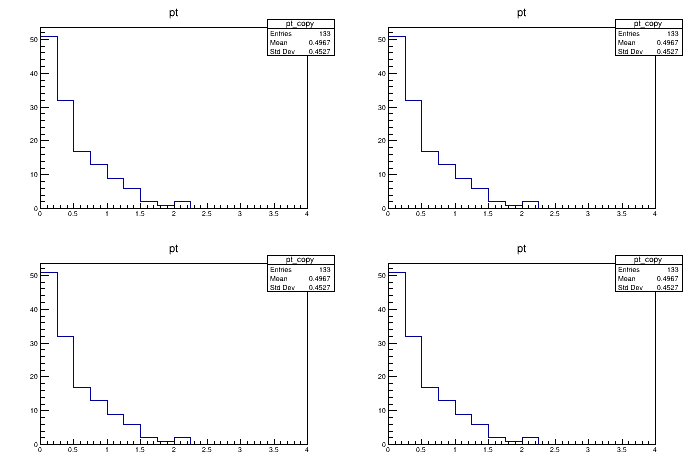

In [7]:
gROOT->GetListOfCanvases()->Draw()